<a href="https://colab.research.google.com/github/ekity1002/pytorch_tutorial/blob/main/1.%20PyTorch%E5%85%A5%E9%96%80(Learning%20PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import torch

# テンソル生成

In [2]:
x = torch.empty(5,3)
x

tensor([[1.3755e+31, 3.0789e-41, 3.3631e-44],
        [0.0000e+00,        nan, 3.0789e-41],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 4.7278e+30]])

In [3]:
torch.rand(5,3)

tensor([[0.5385, 0.6038, 0.2826],
        [0.6499, 0.7131, 0.8061],
        [0.9127, 0.1570, 0.7791],
        [0.8506, 0.3497, 0.0467],
        [0.4750, 0.7401, 0.8803]])

In [4]:
# torch.rand
# torch.empty
# torch.zeros
# torch.randn_like()
# x.new_ones() #xを置き換えて生成
x = x.new_ones(5, 3, dtype=torch.double)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [5]:
x = torch.randn_like(x, dtype=torch.float)
x

tensor([[-0.5416,  1.3116, -0.0633],
        [ 0.3315,  0.1587,  0.1876],
        [ 1.0856, -1.2934, -0.5289],
        [-0.0236,  2.0990, -0.3095],
        [-1.3723, -0.3943, -0.8734]])

In [6]:
# テンソルサイズ
print(x.size())
print(x.shape)

torch.Size([5, 3])
torch.Size([5, 3])


In [7]:
x.shape

torch.Size([5, 3])

# テンソル操作

In [8]:
#テンソル操作
y = torch.rand(5,3)
x + y

tensor([[ 0.0567,  1.9080,  0.7658],
        [ 1.0264,  0.2643,  0.6166],
        [ 1.8456, -0.3519,  0.0074],
        [ 0.9667,  2.7226,  0.2512],
        [-0.3798,  0.0233, -0.5363]])

In [9]:
torch.add(x, y)

tensor([[ 0.0567,  1.9080,  0.7658],
        [ 1.0264,  0.2643,  0.6166],
        [ 1.8456, -0.3519,  0.0074],
        [ 0.9667,  2.7226,  0.2512],
        [-0.3798,  0.0233, -0.5363]])

In [10]:
# 出力先のテンソルを out 引数に指定することができる
result = torch.empty_like(x)
torch.add(x,y, out=result)
result

tensor([[ 0.0567,  1.9080,  0.7658],
        [ 1.0264,  0.2643,  0.6166],
        [ 1.8456, -0.3519,  0.0074],
        [ 0.9667,  2.7226,  0.2512],
        [-0.3798,  0.0233, -0.5363]])

In [11]:
# inplace 処理
# メソッドの後に _ をつけると、変数に上書きされる
print(y)
print(y.add(x)) 
print(y) #y は変化なし
y.add_(x)
print(y) #yの値が変わる

tensor([[0.5982, 0.5963, 0.8291],
        [0.6949, 0.1055, 0.4289],
        [0.7600, 0.9415, 0.5364],
        [0.9903, 0.6236, 0.5607],
        [0.9925, 0.4176, 0.3371]])
tensor([[ 0.0567,  1.9080,  0.7658],
        [ 1.0264,  0.2643,  0.6166],
        [ 1.8456, -0.3519,  0.0074],
        [ 0.9667,  2.7226,  0.2512],
        [-0.3798,  0.0233, -0.5363]])
tensor([[0.5982, 0.5963, 0.8291],
        [0.6949, 0.1055, 0.4289],
        [0.7600, 0.9415, 0.5364],
        [0.9903, 0.6236, 0.5607],
        [0.9925, 0.4176, 0.3371]])
tensor([[ 0.0567,  1.9080,  0.7658],
        [ 1.0264,  0.2643,  0.6166],
        [ 1.8456, -0.3519,  0.0074],
        [ 0.9667,  2.7226,  0.2512],
        [-0.3798,  0.0233, -0.5363]])


In [12]:
# インデクシング、スライシング
# numpy と同様
print(x[:, 1])

tensor([ 1.3116,  0.1587, -1.2934,  2.0990, -0.3943])


In [13]:
# リサイズ view関数をつかう
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.shape, z.shape)

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [14]:
# item() : 要素一つのテンソル(スカラーテンソル)から値を取り出す
print(x[0,0]) # torch.tensor型
print(x[0,0].item()) # float

tensor(-1.3773)
-1.3773304224014282


# numpy との接続
* Char Tensor を覗いて相互に変換可能
* CPU上にある場合、 torch tensor と numpy Array はメモリ上の同じ領域に配置され変換できる

## tensor -> numpy array 変換

In [15]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [16]:
b = a.numpy() # numpy() で numpy 配列へ
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [17]:
# aと b はメモリ上の同じ領域を参照している
# aの参照先を書き換えると b の値も変わる
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


# CUDA テンソル

In [21]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    y = torch.ones_like(x, device=device) #GPU上に直接テンソル作成
    x = x.to(device) # CPUテンソルに to メソッドを使って GPUにすることもできる
    z = x + y
    print(z)
    #print(type(z))
    print(z.to('cpu', torch.double)) # CPU上にもどし、同時にデータタイプも変更する
    #print(type(z.to('cpu', torch.double)))

tensor([[-0.3773, -0.6808,  2.7629, -0.9727],
        [ 0.7304,  2.4709,  2.6406,  0.1876],
        [-1.3725,  0.5480,  0.7172,  0.2644],
        [ 0.1005,  1.6660,  1.4587, -0.8914]], device='cuda:0')
tensor([[-0.3773, -0.6808,  2.7629, -0.9727],
        [ 0.7304,  2.4709,  2.6406,  0.1876],
        [-1.3725,  0.5480,  0.7172,  0.2644],
        [ 0.1005,  1.6660,  1.4587, -0.8914]], dtype=torch.float64)


#  自動微分
* autograd パッケージで提供
* define-by-run(データを流しながらモデルを構築) する

## テンソル
* requires_grad 属性に True が指定された場合、autogradによってすべての操作が追跡される
* 操作後、.backward() を呼び出すと すべての操作に対する勾配が自動で計算される
* tensor に対する勾配は .grad 属性に蓄積される
* 追跡を停止する場合は .detach() を呼び出す。その後 このてんそるは追跡されない

In [31]:
x = torch.ones(2,2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [32]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [33]:
y.grad_fn #計算履歴を grad_fn属性として持つ

In [34]:
z = y*y*3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [35]:
a = torch.randn(2,2)
a = ((a*3) / (a-1))
print(a.requires_grad)

False


In [36]:
# requires_grad属性の書き換え
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

True


## 勾配計算

In [37]:
out.backward()
print(out)

tensor(27., grad_fn=<MeanBackward0>)


In [40]:
# dout(i)/ dx(i) の成分を格納した行列
# backward は ヤコビアンを計算する
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [39]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [49]:
x = torch.randn(3, requires_grad=True)
y = x*2

In [50]:
a = torch.randn(2,2)
print(a)
a.data.norm() #

tensor([[-1.3710, -0.5114],
        [ 0.2415,  0.2590]])


tensor(1.5055)

In [55]:
# 引数なしのnorm() 各要素を２条して ルートを取る
print(torch.sqrt(y[0]*y[0] + y[1]*y[1] + y[2]*y[2])) #と同じ
while y.data.norm() < 1000:
    y = y*2
print(y)

tensor(3.8228, grad_fn=<SqrtBackward>)
tensor([-1282.1429,  1035.5513, -1055.7469], grad_fn=<MulBackward0>)


In [56]:
# backwardするテンソルがスカラーでない場合、backward に引数を指定する必要がある
# xの値を vにしたときの 勾配を計算
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

In [58]:
x.grad

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])

In [59]:
# autogradが必要ない場合 with no_gradでくくる
# -> 学習中にモデル構築に使用した テンソルに演算などがOKになる
with torch.no_grad():
    print((x**2).requires_grad)

False


In [63]:
# tensor.detach() で autograd されないtensor を返却する
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


In [64]:
# すべてのxの要素とyの要素が等しいか
x.eq(y).all()

tensor(True)

* tensorは grad_fn 属性に そのテンソルを作成した関数の参照を持つ。
* ユーザー直接定義の場合は None.

In [66]:
x = torch.randn(2,2, requires_grad=True)
print(x.grad_fn)

None


# ニューラルネットワーク入門

学習手順
* ネットワーク定義
* 入力データセットに対してループ処理
* 入力をネットワークに演算
* 損失(正解との乖離度)を計算
* 勾配をネットワークパラメータに逆伝搬
* ネットワークの重みを更新。

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3) #in_channels, out_channels, kernel_size
        self.conv2 = nn.Conv2d(6, 16, 3)

        self.fc1 = nn.Linear(16*6*6, 120) #6*6 image
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))

        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:] #バッジサイズ以外(width, height, channel )部分のサイズ
        num_features=1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


* モデルには forward を定義するだけで良い

In [22]:
# net.parameters() で学習可能なパラメータを取得
params = list(net.parameters())
print(len(params))
print(params[0].size()) #conv1 の weight

10
torch.Size([6, 1, 3, 3])


In [23]:
input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[-0.0184, -0.0569, -0.0208,  0.0187, -0.0721,  0.0518, -0.0292, -0.0727,
         -0.0004, -0.1161]], grad_fn=<AddmmBackward>)


In [24]:
# テンソルに蓄積した勾配バッファーを初期化し、誤差逆伝播させる
net.zero_grad()
out.backward(torch.randn(1,10))

* netに入力するデータはかならずバッジサイズの次元を持たなければならない。
* 一つだけのデータを保つ場合は data.unsqueeze(0) を使うなどして次元を追加すること

## 損失関数

In [25]:
output = net(input)
target = torch.randn(10) #適当な正解ターゲット
target = target.view(1, -1) 
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1536, grad_fn=<MseLossBackward>)


In [29]:
# 逆伝搬計算グラフをたどる
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0]) #Linear
print(loss.grad_fn.next_functions[0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) #relu

(<AddmmBackward object at 0x7ff78d280ad0>, 0)


In [30]:
net.zero_grad()     # netのパラメータの勾配をゼロにする

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward() #lossに対する勾配を計算してネットワークに乗せる

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0047, -0.0031,  0.0156,  0.0043, -0.0087, -0.0087])


## 重み更新
* weight = weight - 学習率*勾配

In [32]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad() # ネットワークの勾配を０に初期化しておく。前の操作で蓄積されたままなので。
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() #モデルパラメータ更新

In [37]:
net.conv2.bias.grad

tensor([ 0.0118, -0.0019,  0.0009,  0.0014,  0.0039, -0.0014,  0.0122,  0.0079,
        -0.0156,  0.0003,  0.0003,  0.0155,  0.0187,  0.0006,  0.0058, -0.0067])

#  チュートリアル：クラス分類モデル学習

In [1]:
# cifer10
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.shape

torch.Size([4, 3, 32, 32])

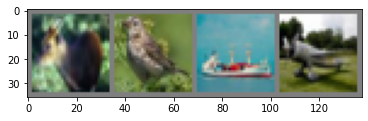


 deer  bird  ship plane


In [5]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## ネットワーク定義

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [7]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## ネットワークの訓練

In [8]:
for epoch in range(2):
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # データセットのデータを [inputs, labels] の形で取得
        inputs, labels = data

        # パラメータの勾配をリセット
        optimizer.zero_grad()

        # 順伝搬＋逆伝搬+パラメータ更新
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #統計情報表示
        running_loss += loss.item()
        if i%2000 == 1999: #2000ミニバッジにつき１ど表示
            print(f'running loss: {running_loss / 2000}')
            running_loss=0
print('train fin.')

running loss: 2.2004435006380083
running loss: 1.9249726249575614
running loss: 1.7077439697384835
running loss: 1.6199666763544083
running loss: 1.5343332067281008
running loss: 1.4998797699436546
running loss: 1.4389100878238679
running loss: 1.4122581478059293
running loss: 1.390766354687512
running loss: 1.3447073218151926
running loss: 1.3323818542212247
running loss: 1.3399008949697018
train fin.


* モデル保存：かくちょうしは pth or ptが監修
* 

In [9]:
# モデルの重みを保存
torch.save(net.state_dict(), './model.pth') 

In [10]:
net = Net()
net.load_state_dict(torch.load('./model.pth'))
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### 予測

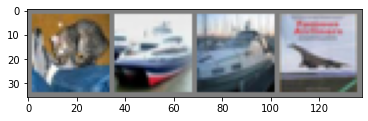

tensor([3, 8, 8, 0])


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(labels)

In [12]:
outputs = net(images)
outputs

tensor([[-0.6003, -1.0116, -0.0593,  2.2166, -0.5762,  1.2074,  0.2221, -0.2381,
         -0.2272, -1.1777],
        [ 3.0962,  3.1565, -1.6083, -1.7905, -3.0681, -3.3746, -3.6000, -2.9475,
          5.1421,  2.7738],
        [ 1.7326,  2.8935, -1.2928, -1.1447, -2.6240, -2.2258, -2.7984, -1.8810,
          3.0871,  2.4511],
        [ 1.7107,  1.1877, -0.7684, -0.7496, -1.6402, -1.8640, -2.7167, -0.9558,
          2.8858,  2.2211]], grad_fn=<AddmmBackward>)

In [16]:
outputs.shape
print(torch.max(outputs, 1))

torch.return_types.max(
values=tensor([2.2166, 5.1421, 3.0871, 2.8858], grad_fn=<MaxBackward0>),
indices=tensor([3, 8, 8, 8]))


In [13]:
_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([3, 8, 8, 8])


In [31]:
outputs.data

tensor([[-0.9875, -0.9993, -0.1558,  2.5356, -1.5486,  1.9218,  0.2911, -1.2797,
          1.9018, -1.0296],
        [ 6.7262,  9.4824, -3.5258, -7.0702, -4.4929, -6.1183, -4.8192, -7.0212,
          9.1022,  5.6378],
        [ 3.6950,  4.2564, -0.7892, -3.2752, -1.6971, -3.3506, -2.9864, -3.2753,
          5.1796,  1.9102],
        [ 4.1180,  1.2878, -0.3412, -2.8705, -0.3523, -3.3656, -1.6538, -3.3683,
          5.4395,  0.6636]])

In [32]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        #print(images.shape, labels.shape)
        #break
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'ACC: {100 * correct/total}')

ACC: 56.57


In [33]:
# クラスごとの正解率
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

ZeroDivisionError: ignored

## GPUでの学習


In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# GPU搭載のCUDA環境を前提としており、その場合はcuda:0と出力されるはずです
print(device)

cuda:0


In [35]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [36]:
inputs, labels = data[0].to(device), data[1].to(device)

In [37]:
# 日本語訳注：GPU版で訓練を実行した場合

# optimizerを再定義（netがGPU上に移動したので）
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


for epoch in range(2):  # データセットを何巡繰り返すか

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 入力を取得します; 変数dataはリスト[inputs, labels]です
        # inputs, labels = data  # cpuの場合をコメントアウト
        inputs, labels = data[0].to(device), data[1].to(device)

        # 勾配を0に初期化
        optimizer.zero_grad()

        # 順伝搬、逆伝搬、パラメータ更新
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 統計情報を出力
        running_loss += loss.item()
        if i % 2000 == 1999:    #  2000ミニバッチごとに出力
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.224
[1,  4000] loss: 1.205
[1,  6000] loss: 1.201
[1,  8000] loss: 1.192
[1, 10000] loss: 1.149
[1, 12000] loss: 1.168
[2,  2000] loss: 1.101
[2,  4000] loss: 1.110
[2,  6000] loss: 1.082
[2,  8000] loss: 1.098
[2, 10000] loss: 1.144
[2, 12000] loss: 1.084
Finished Training


# その他例

In [25]:
import torch
dtype=torch.float
device = torch.device('cpu')
#device = torch.device('cuda:0)
#torch.backends.cuda.matmul.allow_tf32 = False 
# 上の行でTensorFloat32を無効にしています。
# TensorFloat32を用いると精度を犠牲にして、ネットワークの高速化を図ることができます。
# TensorFloat32は多くのモデルにおいて有効ですが、このチュートリアルで取り扱う簡易的な
# モデルでは、精度が下がることが原因で損失が収束しないという問題が発生します。
# 詳細については、以下を参照してください：
# https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices

N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)
learning_rate=1e-6
for t in range(500):
    # x.mm() : 2次元の行列の積を計算する。 ２次元専用.
    # x.dot(): １次元専用
    # x.matmul(): 一般の行列同士の積
    # clamp: 値を min~max の間に制限する.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # RMSE手動定義
    loss = (y_pred - y).pow(2).sum()
    
    if t%100 == 99:
        print(t, loss.item())

    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

    w1.grad.zero_()
    w2.grad.zero_()

99 429.7945251464844
199 2.006305694580078
299 0.016393426805734634
399 0.0003674675535876304
499 5.4821324738441035e-05


## 自作のネットワーク関数の実装

In [26]:
import torch

class MyReLU(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input):
        """
        ctx:逆伝搬の際に必要な情報を格納するオブジェクト
        save_for_backward で逆伝搬に必要な情報を保持する必要がある
        """
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        """
        逆伝搬
        """
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

In [27]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  
# GPUで実行する場合はコメントアウトを解除してください。
# torch.backends.cuda.matmul.allow_tf32 = False  
# GPUで実行する場合はコメントアウトを解除してください。

# 上の行でTensorFloat32を無効にします。
# TensorFloat32を用いると精度を犠牲にして、ネットワークの高速化を図ることができます。
# TensorFloat32は多くのモデルにおいて有効ですが、このチュートリアルで取り扱う簡易的な
# モデルでは、精度が下がることが原因で損失が収束しないという問題が発生します。
# 詳細については、以下を参照してください：
# https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices

# N：バッチサイズ         D_in：入力層の次元数
# H：隠れ層の次元数       D_out： 出力層の次元数
N, D_in, H, D_out = 64, 1000, 100, 10

# 乱数により入力データと目標となる出力データを表すTensorを生成
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# 乱数による重みを表すTensorの定義
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # 関数を適用するには、Function.applyメソッドを用います。
    # reluと命名しておきます。
    relu = MyReLU.apply

    y_pred = relu(x.mm(w1)).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

99 706.4309692382812
199 2.213155508041382
299 0.0091784056276083
399 0.00017931168258655816
499 3.321389522170648e-05


## NN定義

In [3]:
import torch
# N：バッチサイズ         D_in：入力層の次元数
# H：隠れ層の次元数       D_out： 出力層の次元数
N, D_in, H, D_out = 64, 1000, 100, 10

# 乱数により入力データと目標となる出力データを表すTensorを生成
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

99 68.72482299804688
199 1.7824593782424927
299 0.022913040593266487
399 0.0004051182186231017
499 7.814544915163424e-06


In [5]:
#カスタムモジュール
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

# N：バッチサイズ         D_in：入力層の次元数
# H：隠れ層の次元数       D_out： 出力層の次元数
N, D_in, H, D_out = 64, 1000, 100, 10

# 乱数により入力データと目標となる出力データを表すTensorを生成
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 上で定義したクラスをインスタンス化してモデルを構築
model = TwoLayerNet(D_in, H, D_out)

# 損失関数とオプティマイザを定義します。
# model.parameters()を呼び出すことで、モデルのメンバ変数である2つのnnn.Linearモジュールの
# 学習可能なパラメータをSGDのコンストラクタの引数として渡すことができます。
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
    # 順伝播:入力xから予測値yをモデルで算出します。
    y_pred = model(x)

    # 損失の計算と表示
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 勾配を0に初期化し、逆伝播を実行することで重みを更新
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


99 2.522575855255127
199 0.030871784314513206
299 0.0010862353956326842
399 5.667811637977138e-05
499 3.4170777780673234e-06


In [10]:
# 重み共有レイヤーをもつ　ネットワーク
import random
import torch

class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H,H)
        self.output_linear = torch.nn.Linear(H, D_out)


    def forward(self, x):
        """
        ランダム 0-3の値を選択肢、その数だけ中間層のモジュールを再利用する
        forward 実行のたびにネットワークが動的に変化する
        """
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(random.randint(0, 4)):
            #print(_)
            h_relu = self.middle_linear(h_relu).clamp(0)
        y_pred = self.output_linear(h_relu)
        return y_pred



# N：バッチサイズ         D_in：入力層の次元数
# H：隠れ層の次元数       D_out： 出力層の次元数
N, D_in, H, D_out = 64, 1000, 100, 10

# 乱数により入力データと目標となる出力データを表すTensorを生成
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 上で定義したクラスをインスタンス化してモデルを構築します。
model = DynamicNet(D_in, H, D_out)

# 損失関数とオプティマイザを定義します。
# この奇妙なモデルを通常の確率勾配降下法で訓練するのは難しいので、モーメンタムを使用します。
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
for t in range(500):
    # 順伝播:入力xから予測値yをモデルで算出します。
    y_pred = model(x)


    # 損失の計算と表示
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(model.parameters)
        print(t, loss.item())

    # 勾配を0に初期化し、逆伝播を実行することで重みを更新します
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


<bound method Module.parameters of DynamicNet(
  (input_linear): Linear(in_features=1000, out_features=100, bias=True)
  (middle_linear): Linear(in_features=100, out_features=100, bias=True)
  (output_linear): Linear(in_features=100, out_features=10, bias=True)
)>
99 72.0906982421875
<bound method Module.parameters of DynamicNet(
  (input_linear): Linear(in_features=1000, out_features=100, bias=True)
  (middle_linear): Linear(in_features=100, out_features=100, bias=True)
  (output_linear): Linear(in_features=100, out_features=10, bias=True)
)>
199 7.257027626037598
<bound method Module.parameters of DynamicNet(
  (input_linear): Linear(in_features=1000, out_features=100, bias=True)
  (middle_linear): Linear(in_features=100, out_features=100, bias=True)
  (output_linear): Linear(in_features=100, out_features=10, bias=True)
)>
299 3.178210735321045
<bound method Module.parameters of DynamicNet(
  (input_linear): Linear(in_features=1000, out_features=100, bias=True)
  (middle_linear): Lin